In [2]:
#!runSModelS.py -f /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Obs/ -p /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/parameters.ini

In [3]:
#!runSModelS.py -p /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/parameters.ini -f /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Obs

In [2]:
!runSModelS.py -p /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/parameters.ini -f /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Obs -o /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/results/Simp_output_Obs

INFO in databaseObj.loadBinaryFile() in 526: loading binary db file /home/yoxara/smodels/smodels-database/db3.pcl format version 214
INFO in databaseObj.loadBinaryFile() in 533: Loaded database from /home/yoxara/smodels/smodels-database/db3.pcl in 2.5 secs.
INFO in modelTester.loadDatabaseResults() in 498: Including non-validated results
INFO in modelTester.testPoints() in 358: Running SModelS for 31 files with a single process. Messages will be redirected to smodels.log


In [5]:
!runSModelS.py -f /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp/ -p /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/parameters.ini

In [6]:
#!runSModelS.py -p /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/parameters.ini -f /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp

In [3]:
!runSModelS.py -p /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/parameters_simp.ini -f /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp -o /home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/results/Simp_output_Exp

INFO in databaseObj.loadBinaryFile() in 526: loading binary db file /home/yoxara/smodels/smodels-database/db3.pcl format version 214
INFO in databaseObj.loadBinaryFile() in 533: Loaded database from /home/yoxara/smodels/smodels-database/db3.pcl in 2.7 secs.
INFO in modelTester.testPoints() in 358: Running SModelS for 34 files with a single process. Messages will be redirected to smodels.log


In [2]:
#parameters_simp.ini
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pyslha
import matplotlib.pyplot as plt
import numpy as np
import imp,glob,os
cm = plt.colormaps['RdYlBu']
slhaFolder = '/home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Obs'
resultsFolder = '/home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/results/Simp_output_Obs'

In [3]:


data = []
for f in glob.glob(resultsFolder+'/*.py'):
    smodelsDict = imp.load_source(f.replace('.py',''),f).smodelsOutput
    slhaFile = os.path.basename(smodelsDict['OutputStatus']['input file'])
    slhaFile = os.path.join(slhaFolder,slhaFile)
    #Read SLHA file (using pyslha):
    slhaData = pyslha.readSLHAFile(slhaFile)
    data.append((slhaData,smodelsDict))

NameError: name 'inf' is not defined

In [4]:
data = []
inf = float('inf')

for f in glob.glob(resultsFolder+'/*.py'):
    try:
        with open(f, 'r') as file:
            filedata = file.read()
        exec(filedata)
        smodelsDict = locals()['smodelsOutput']
        slhaFile = os.path.basename(smodelsDict['OutputStatus']['input file'])
        slhaFile = os.path.join(slhaFolder,slhaFile)
        #Read SLHA file (using pyslha):
        slhaData = pyslha.readSLHAFile(slhaFile)
        data.append((slhaData,smodelsDict))
    except NameError as e:
        print(f"Error with file {f}: {e}")

my1 = []
gqv = []
r = []

for slhaData, smodelsDict in data:
    if not 'ExptRes' in smodelsDict:  #If no results were applicable, point is allowed
        rmax = 0.0
    else:
        rmax = smodelsDict['ExptRes'][0]['r']  #First result is the most constraining

    mass = slhaData.blocks['MASS'][5000001]  # Y1 mass
    width = slhaData.decays[5000001].totalwidth  # Y1 width
    gvq = slhaData.blocks['DMINPUTS'][4]  # gq

    my1.append(mass)
    gqv.append(gvq)
    r.append(rmax)


In [5]:
import matplotlib.pyplot as plt
import numpy as np


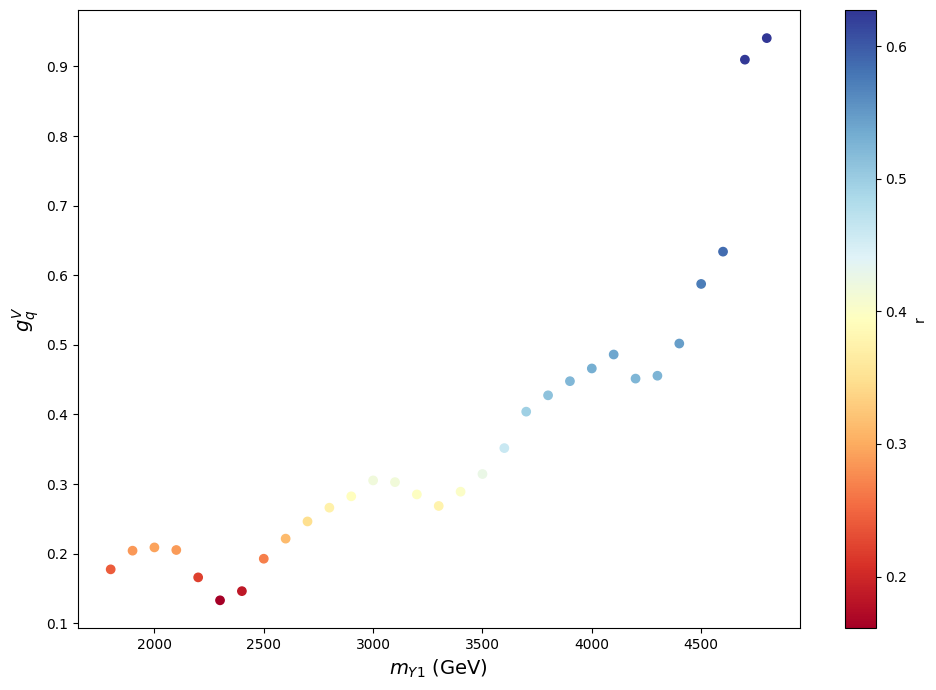

In [14]:
plt.figure(figsize=(10, 7))
#plt.hexbin(my1, gqv, C=r, gridsize=60, cmap='RdYlBu', bins='log')
#plt.scatter(my1, gqv, color='k', marker='.', linewidth=1)
plt.scatter(my1, gqv, c=r, cmap='RdYlBu')
plt.colorbar(label='r')
plt.xlabel(r'$m_{Y1}$ (GeV)', fontsize=14)
plt.ylabel(r'$g_{q}^{V}$', fontsize=14)
plt.tight_layout()
plt.show()

In [15]:
slhaFolder2 = '/home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/slhaFiles/xsec_ppZp_CMS_Exp'
resultsFolder2 = '/home/yoxara/2MDM/Update_Data_val_SmodelS/ppZpjj/results/Simp_output_Exp'

data = []
inf = float('inf')

for f in glob.glob(resultsFolder2+'/*.py'):
    try:
        with open(f, 'r') as file:
            filedata = file.read()
        exec(filedata)
        smodelsDict = locals()['smodelsOutput']
        slhaFile = os.path.basename(smodelsDict['OutputStatus']['input file'])
        slhaFile = os.path.join(slhaFolder2,slhaFile)
        #Read SLHA file (using pyslha):
        slhaData = pyslha.readSLHAFile(slhaFile)
        data.append((slhaData,smodelsDict))
    except NameError as e:
        print(f"Error with file {f}: {e}")

my1 = []
gqv = []
r = []

for slhaData, smodelsDict in data:
    if not 'ExptRes' in smodelsDict:  #If no results were applicable, point is allowed
        rmax = 0.0
    else:
        rmax = smodelsDict['ExptRes'][0]['r']  #First result is the most constraining

    mass = slhaData.blocks['MASS'][5000001]  # Y1 mass
    width = slhaData.decays[5000001].totalwidth  # Y1 width
    gvq = slhaData.blocks['DMINPUTS'][4]  # gq

    my1.append(mass)
    gqv.append(gvq)
    r.append(rmax)

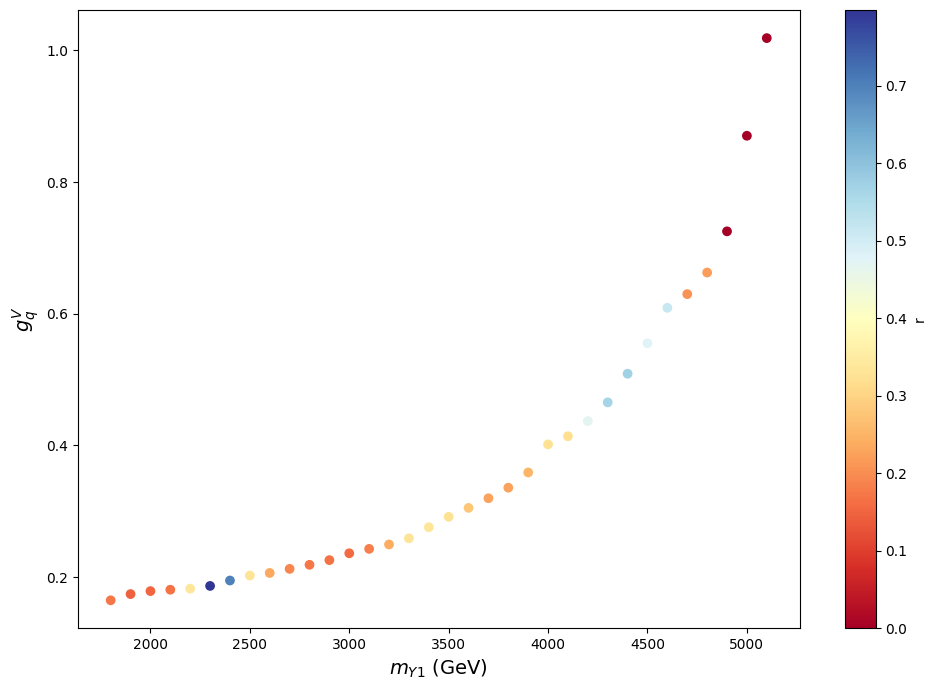

In [16]:
plt.figure(figsize=(10, 7))
#plt.hexbin(my1, gqv, C=r, gridsize=50, cmap='RdYlBu', bins='log')
#plt.hexbin(my1, gqv, C=r, gridsize=50, cmap='RdYlBu')
plt.scatter(my1, gqv, c=r, cmap='RdYlBu')
plt.colorbar(label='r')
plt.xlabel(r'$m_{Y1}$ (GeV)', fontsize=14)
plt.ylabel(r'$g_{q}^{V}$', fontsize=14)
plt.tight_layout()
plt.show()
